In [1]:
# Import these modules to get started
import numpy as np 
import matplotlib.pyplot as plt

We designate our colors `B`, `R`, `D`, and `G` to be integer data and use integer RBG values scaled between `0` and `255`

The code below signifies my pattern data that was provided to me, multiplied by 2. 

In [2]:
B = (44/255, 44/255, 128/255)
R = (200/255, 0/255,0/255)
D = (32/255, 32/255, 96/255)
G = (0/255, 104/255, 24/255)
    
# I duplicate my pattern 2 times to exceed the desired tartan size of 500 by 500.
widths = [50,4,50,20,8,50,4,4,50,4,4,4,50,4,4,50,8,20,50,4]*2
RGBs = [D,B,R,G,R,D,R,G,R,G,R,G,R,G,R,D,R,G,R,B]*2

In [3]:
total_width = sum(widths) #Use the sum function on widths to find the total width of this pattern

#Initialize an array that has shape ((total_width, total_width, 3))
vertical_stripes = np.zeros((total_width, total_width, 3)) 

In [4]:
print(total_width)

884


We want to iterate throuch each width/RGB pair and add the corresponding stripe. Each stripe has a different specific width and color. 

In [5]:
stripe_start = 0 #Where each new stripe starts

# Iterate through each pair of width and RGB
for width, RGB in zip(widths, RGBs): 
    # Assign our colors to the rows and a range of colums to form our stripe
    vertical_stripes[:, stripe_start:stripe_start + width] = RGB
    
    stripe_start = stripe_start + width # Move to next stripe

We use `np.transpose` to rearrange the dimensions of the array for our pattern. In `vertical_stripes`, the first dimension is our rows, then our columns, then the `RGB` values. 

Using `np.transpose`, we can easily swap the rows and columns (`RBG` color channel remains the same), in order to create the horizontal stripes on our pattern. The width and height are swapped so the stripes are rotated.

In [6]:
horizontal_stripes = np.transpose(vertical_stripes,[1,0,2])

To generate the checkerboard pattern, we can use this `for` to loop over each row `i` and column `j`. If the sum of `i` and `j` is even, then it is taken from `vertical_stripes` and if it is odd, then it is taken from `horizontal_stripes`. 

This leads to each color from the vertical and horizontal stripes to alternate to create the checkerboard look. 

In [7]:
tartan = np.zeros((total_width, total_width, 3))#Empty image of this size

for i in range(total_width):
    for j in range(total_width):
        if (i + j) % 2 == 0:
            tartan[i,j] = vertical_stripes[i,j]
        else:
            tartan[i,j] = horizontal_stripes[i,j]

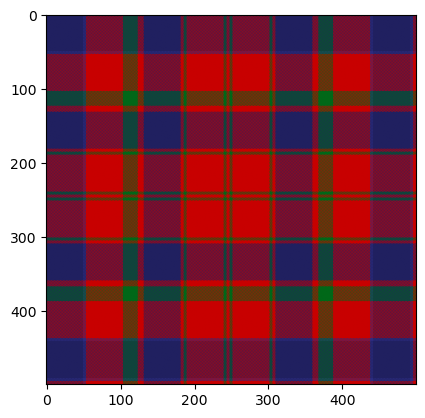

In [8]:
plt.imshow(tartan[:500, :500]) #Take a slice of the generated tartan that has our desired size of 500 x 500

In [9]:
example_tartan = plt.imread('sample_tartan.png') # I want to compare my current tartan with my example tartan

Text(0.5, 1.0, 'Example tartan')

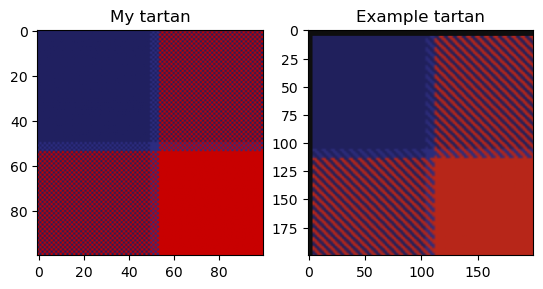

In [10]:
fig = plt.figure()

# Use two subplots to do a close up side by side comparision of our generated tartan vs. example screenshot
ax = plt.subplot(1,2,1)
plt.imshow(tartan[:100,:100]) # Dimension do not exactly match up needed to modify to get a closer look
plt.title('My tartan')

ax = plt.subplot(1,2,2)
#Dimension and shape do not exactly match up needed to modify to get a closer look
plt.imshow(example_tartan[:200,:200,:3]) 
plt.title('Example tartan')

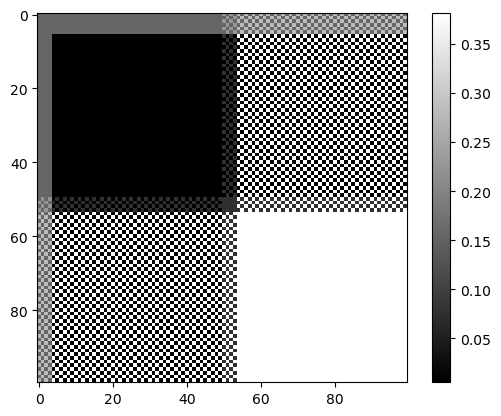

In [11]:
plt.imshow(np.abs(tartan[:100,:100] - example_tartan[:100,:100,:3]).mean(axis=2),cmap='gray')
plt.colorbar() 
#Checkerboard Effect shows up but it is not close enough to our authentic tartan pattern

How can we make the pattern more authentic? We need $16$ `if/elif/else` statements to generate the authentic pattern to decide whether to pull from the horizontal or vertical stripes.

Through different trials, I found that `(i-j)` and `(j-i)` results in diagonal stripes from top-left to bottom right while `(i+j)` and `(j+i)` had the opposite effect. The code alternates the horizontal and vertical stripes on the diagonal to create the woven effect. The color of the pixel repeats every $4$ pixels. 

In [12]:
for i in range(total_width):
    for j in range(total_width):
        
        #Continue to repeat based on % 4. Runs through every possibility 
        if (i - j) % 4 == 0 and (j - i) % 4 == 0:
            tartan[i,j] = horizontal_stripes[i,j]
        elif (i - j) % 4 == 0 and (j - i) % 4 == 1:
            tartan[i,j] = horizontal_stripes[i,j]
        elif (i - j) % 4 == 0 and (j - i) % 4 == 2:
            tartan[i,j] = vertical_stripes[i,j]
        elif (i - j) % 4 == 0 and (j - i) % 4 == 3:
            tartan[i,j] = vertical_stripes[i,j]
        elif (i - j) % 4 == 1 and (j-i) % 4 == 0:
            tartan[i,j] = horizontal_stripes[i,j]
        elif (i - j) % 4 == 1 and (j-i) % 4 == 1:
            tartan[i,j] = horizontal_stripes[i,j]
        elif (i - j) % 4 == 1 and (j-i) % 4 == 2:
            tartan[i,j] = vertical_stripes[i,j]
        elif (i - j) % 4 == 1 and (j-i) % 4 == 3:
            tartan[i,j] = vertical_stripes[i,j]
        elif (i - j) % 4 == 2 and (j-i) % 4 == 0: 
            tartan[i,j] = horizontal_stripes[i,j]
        elif (i - j) % 4 == 2 and (j-i) % 4 == 1: 
            tartan[i,j] = horizontal_stripes[i,j]
        elif (i - j) % 4 == 2 and (j-i) % 4 == 2: 
            tartan[i,j] = vertical_stripes[i,j]
        elif (i - j) % 4 == 2 and (j-i) % 4 == 3: 
            tartan[i,j] = vertical_stripes[i,j]
        elif (i - j) % 4 == 3 and (j-i) % 4 == 0: 
            tartan[i,j] = horizontal_stripes[i,j]
        elif (i - j) % 4 == 3 and (j-i) % 4 == 1: 
            tartan[i,j] = horizontal_stripes[i,j]
        elif (i - j) % 4 == 3 and (j-i) % 4 == 2: 
            tartan[i,j] = vertical_stripes[i,j]
        elif (i - j) % 4 == 3 and (j-i) % 4 == 3: 
            tartan[i,j] = vertical_stripes[i,j]

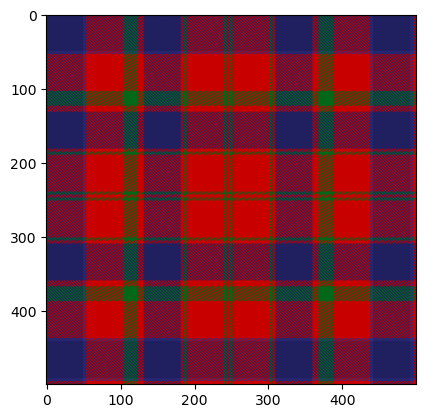

In [13]:
plt.imshow(tartan[:500,:500]) # What does our pattern look like now?

Once again, I look to compare my tartan vs my example tartan. A side by side comparision helps. 

Text(0.5, 1.0, 'Example tartan')

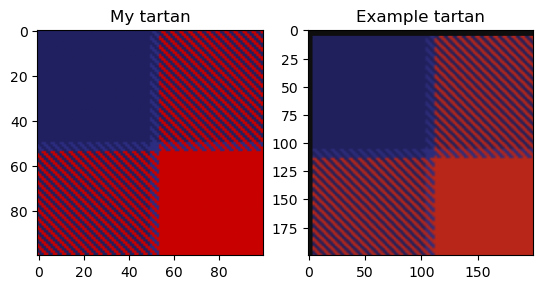

In [14]:
fig = plt.figure()

ax = plt.subplot(1,2,1)
plt.imshow(tartan[:100,:100])
plt.title('My tartan')

ax = plt.subplot(1,2,2)
plt.imshow(example_tartan[:200,:200,:3])
plt.title('Example tartan')

My tartan looks great and has the generate woven effect and the diagonals are going in the correct direction. However, my code above is very ineffiencent. Having $16$ `if/elif/else` functions is incredibly tedious to modify and a time waster. 

In order to optimize this process, I created a `for` loop (similar to the above loop for our checkerboard pattern). This loop says that if the difference between our row `i` and column `j` modulo  $4$ is $< 2$ then we can pick out the `horizontal_stripes`. If not, then we pick out the `vertical_stripes`. This exaqctly the same as what the $16$ statements above are saying but it is much more effiecient and dynamic. 

In [15]:
for i in range(total_width):
    for j in range(total_width):
        if (i - j) % 4 < 2:  
            tartan[i,j] = horizontal_stripes[i,j]
        else:
            tartan[i,j] = vertical_stripes[i,j]

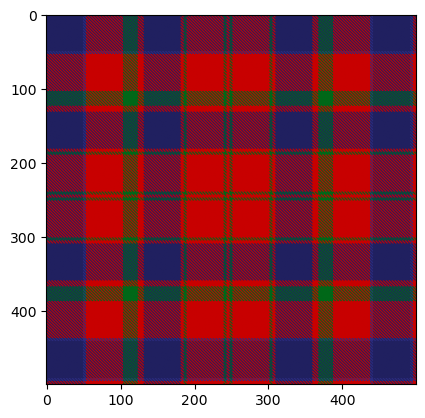

In [16]:
plt.imshow(tartan[:500,:500]) #Does it look the same as above?

Text(0.5, 1.0, 'Example tartan')

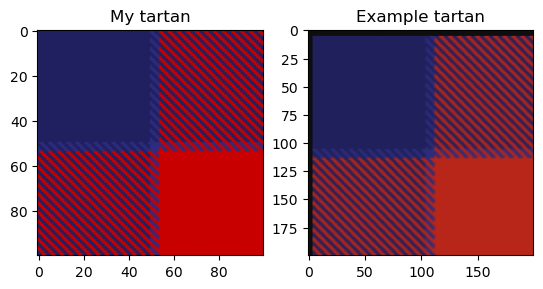

In [17]:
# Side by Side comparision
fig = plt.figure()

ax = plt.subplot(1,2,1)
plt.imshow(tartan[:100,:100])
plt.title('My tartan')

ax = plt.subplot(1,2,2)
plt.imshow(example_tartan[:200,:200,:3])
plt.title('Example tartan')

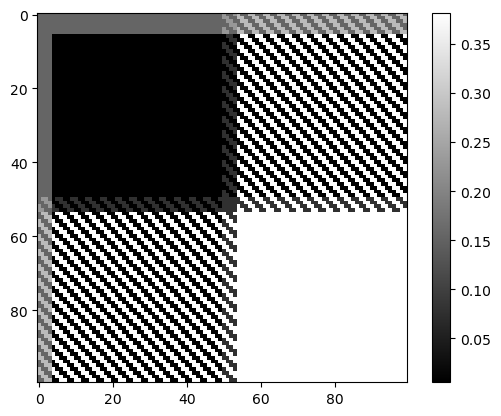

In [18]:
plt.imshow(np.abs(tartan[:100,:100] - example_tartan[:100,:100,:3]).mean(axis=2),cmap='gray')
plt.colorbar()
# Now you can clearly see the the woven tartan pattern generated